In [5]:
%matplotlib inline
import datetime
import numpy as np
from pandas_datareader import data
from scipy.stats import norm
import matplotlib.pyplot as plt
import math

In [46]:
class FM:
    def __init__(self,ExpectedReturn,P, c,company,provider):
        self.ExpectedReturn  = ExpectedReturn
        self.P = P
        self.c  = c
        self.company  = company
        self.provider  =  provider
    def Risk(self):
        return ((1.3125* self.ExpectedReturn **2 - 0.2625*self.ExpectedReturn + 0.014725 ))**0.5
    def CML(self,Risk):
        return 0.060 + 1.327367 * Risk 
    def var_cov_var(self,mu,sigma):
            """
            Variance-Covariance calculation of daily Value-at-Risk
            using confidence level c, with mean of returns mu
            and standard deviation of returns sigma, on a portfolio
            of value P.
            """
            alpha = norm.ppf(1-self.c,mu,sigma)
            return self.P - self.P*(alpha + 1)
    def print_con_var(self):
        mu,sigma =  self.get_portfolio()
        var = self.var_cov_var(mu, sigma)
        print ("===========================")
        print ("Value-at-Risk: $%0.6f" % var)
        print ("===========================")
        print ("Mean is: $%0.7f" % mu)
        print ("===========================")
        print ("Variance is: $%0.6f" % sigma)
        print ("===========================")
    def get_portfolio(self):
        s_date = datetime.datetime(2017, 1, 1)
        e_date = datetime.datetime(2020, 1, 1)
        Netflix = data.DataReader(self.company, self.provider, s_date, e_date)
        Netflix["rets"] = Netflix["Adj Close"].pct_change()
        mu = np.mean(Netflix["rets"])
        sigma = np.std(Netflix["rets"])
        return(mu, sigma)
    def plotr(self):
        R =  self.Risk()
        cml =  self.CML(R)
        fig =  plt.figure(figsize=(10,8))
        plt.plot(R,self.ExpectedReturn)
        plt.plot(R, cml)
        plt.xlabel(r'$\sigma_{\pi}$',fontsize=12)
        plt.ylabel(r'$\bar{R}_{\pi}$',fontsize=12)
        plt.legend(['Exprected Return','CML'])
        plt.title(r'A plot of $\sigma_{\pi}$ vs  $\bar{R}_{\pi}$ , CML in $(\bar{R},\sigma)$ space ',fontsize=12)
        plt.show()

## Exercise 1

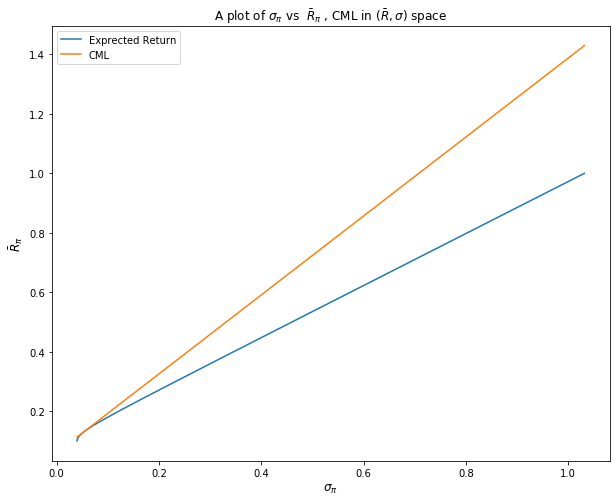

In [47]:
ExpectedReturn = np.linspace(0.1, 1,250)

P = 1000  # 1,000 USD
c = 0.95  # 95% confidence interval
company = "NFLX"
provider  = "yahoo"
fm  =  FM(ExpectedReturn,P,c,company,provider)
fm.plotr()

## Exercise 4

In [48]:
fm.print_con_var()

Value-at-Risk: $36.878877
Mean is: $0.0015091
Variance is: $0.023338
